# 1. Import the required libraries

In [2]:

import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import models

import random
import numpy as np

In [4]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of
                        # numbers will appear every time.
tf.random.set_seed(42)  # sets the graph-level random seed


# 2. Data Acquisition

In [5]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Data Preparation

Text(0.5, 1.0, 'Ground Truth (Test): 7')

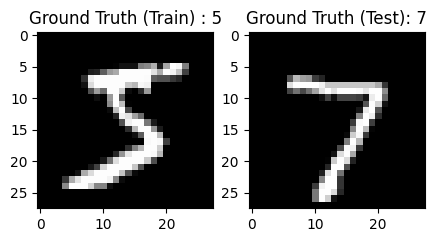

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))


In [7]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [9]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28.
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28.
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [10]:
# print a sample of normalized data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using



In [11]:
# Create a model object

dnnModel = models.Sequential()

In [12]:
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
dnnModel_adam = models.Sequential()
dnnModel_adam.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_adam.add(layers.Dense(60, activation='relu'))
dnnModel_adam.add(layers.Dense(30, activation='relu'))
dnnModel_adam.add(layers.Dense(10, activation='softmax'))
dnnModel_adam.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
dnnModel_rmsprop = models.Sequential()
dnnModel_rmsprop.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_rmsprop.add(layers.Dense(60, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(30, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(10, activation='softmax'))
dnnModel_rmsprop.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_adam.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_rmsprop.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

# 5. Training the model


In [16]:
# train the model

h_sgd  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_adam  = dnnModel_adam.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_rms  = dnnModel_rmsprop.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)

Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3466 - loss: 1.9892 - val_accuracy: 0.8655 - val_loss: 0.5466
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8531 - loss: 0.5383 - val_accuracy: 0.9150 - val_loss: 0.3128
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8921 - loss: 0.3771 - val_accuracy: 0.9290 - val_loss: 0.2628
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9059 - loss: 0.3222 - val_accuracy: 0.9368 - val_loss: 0.2338
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9159 - loss: 0.2864 - val_accuracy: 0.9435 - val_loss: 0.2121
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9231 - loss: 0.2590 - val_accuracy: 0.9485 - val_loss: 0.1942
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9298 - loss: 0.2365 - val_accuracy: 0.9500 - val_loss: 0.1800
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9352 - loss: 0.2177 - val_accuracy: 0.

In [18]:
#print('Final training loss \t', h.history['loss'][-1])
print('SGD Final training accuracy ', h_sgd.history['accuracy'][-1])
print('Adam Final training accuracy ', h_adam.history['accuracy'][-1])
print('RMSProp Final training accuracy ', h_rms.history['accuracy'][-1])

SGD Final training accuracy  0.9737407565116882
Adam Final training accuracy  0.9953148365020752
RMSProp Final training accuracy  0.995888888835907


# 6. Test the model


In [19]:
# testing the model

testLoss_sgd, testAccuracy_sgd = dnnModel.evaluate( Xtest, Ytest)
testLoss_adam, testAccuracy_adam = dnnModel_adam.evaluate( Xtest, Ytest)
testLoss_rms, testAccuracy_rms = dnnModel_rmsprop.evaluate( Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9592 - loss: 0.1311
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9629 - loss: 0.1929
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9638 - loss: 0.2246


In [20]:
print('Testing loss \t', testLoss_sgd)
print('Testing accuracy ', testAccuracy_sgd)

print('Testing loss \t', testLoss_adam)
print('Testing accuracy ', testAccuracy_adam)

print('Testing loss \t', testLoss_rms)
print('Testing accuracy ', testAccuracy_rms)

Testing loss 	 0.11305821686983109
Testing accuracy  0.9650999903678894
Testing loss 	 0.16522839665412903
Testing accuracy  0.9675999879837036
Testing loss 	 0.19557134807109833
Testing accuracy  0.9699000120162964


# 7. Report the result




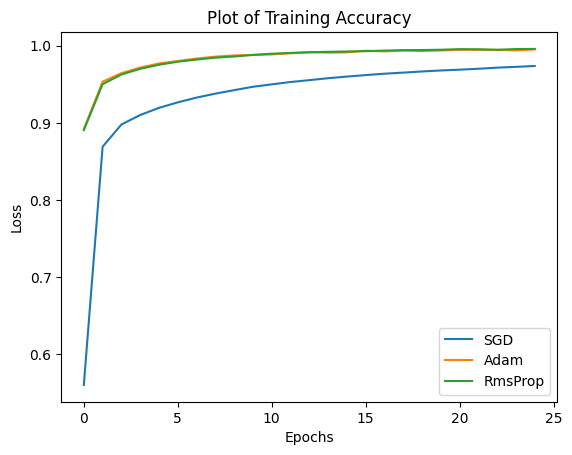

In [21]:
# plot the training accuracy

plt.plot(h_sgd.history['accuracy'], label='SGD')
plt.plot(h_adam.history['accuracy'], label='Adam')
plt.plot(h_rms.history['accuracy'], label='RmsProp')
#plt.plot(h.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

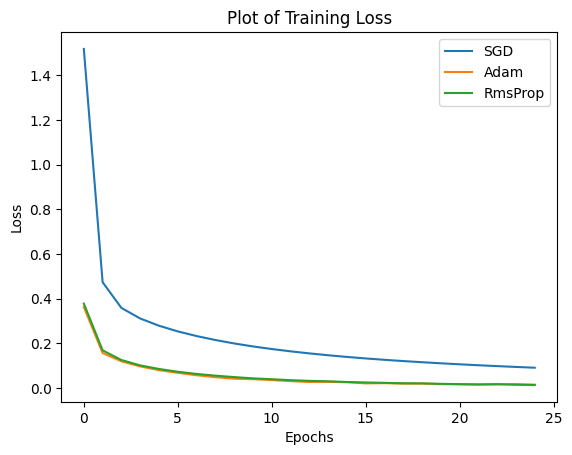

In [22]:
# plot the training loss

plt.plot(h_sgd.history['loss'], label='SGD')
plt.plot(h_adam.history['loss'], label='Adam')
plt.plot(h_rms.history['loss'], label='RmsProp')
#plt.plot(hes.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()